# Normalize

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X= scaled_features

## K-means

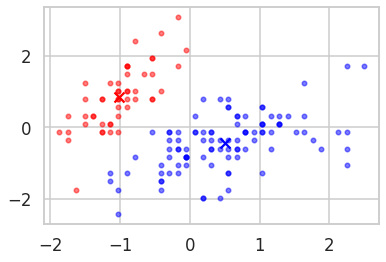

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=2,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_2 = kmeans.fit(X)
display_cluster(X,clusters_2,2)

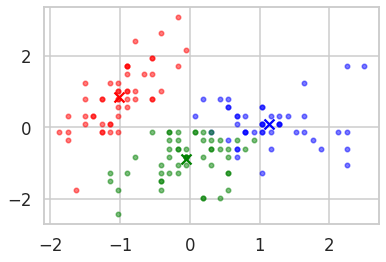

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_3 = kmeans.fit(X)
display_cluster(X,clusters_3,3)

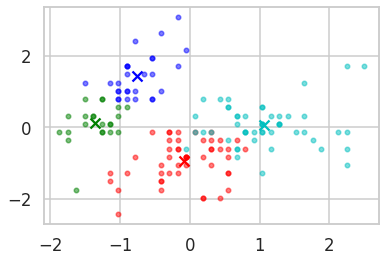

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=4,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_4 = kmeans.fit(X)
display_cluster(X,clusters_4,4)

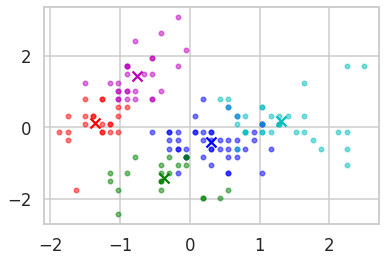

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=5,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_5 = kmeans.fit(X)
display_cluster(X,clusters_5,5)

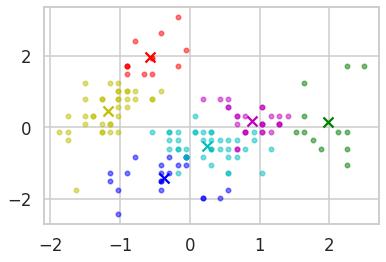

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=6,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_6 = kmeans.fit(X)
display_cluster(X,clusters_6,6)

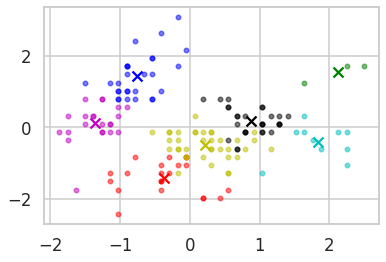

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=7,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_7 = kmeans.fit(X)
display_cluster(X,clusters_7,7)

Distortion function versus K

In [ ]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }

In [ ]:
distortions = []
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)

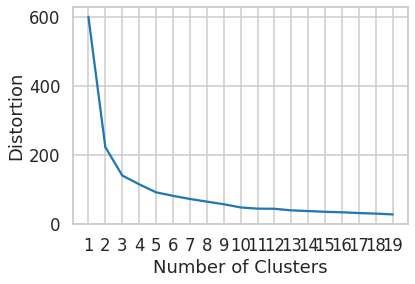

In [ ]:
plt.plot(range(1, 20), distortions)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.show()

silhouette score versus K

In [ ]:
silhouette_coefficients = []
for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

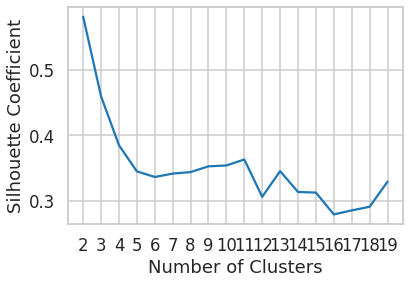

In [ ]:
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Hierarchal

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [ ]:
###Euclidean affinity and average linkage

In [ ]:
clustering_euc_avg_1 = AgglomerativeClustering(n_clusters = None, affinity = "euclidean", linkage = "average", distance_threshold= 1, compute_full_tree= True)

In [ ]:
metrics.silhouette_score(X, clustering_euc_avg_1.fit(X).labels_)

0.30087506250740886

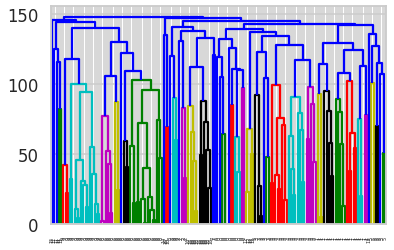

In [ ]:
plot_dendrogram(clustering_euc_avg_1, labels=clustering_euc_avg_1.fit(X).labels_)
plt.show()

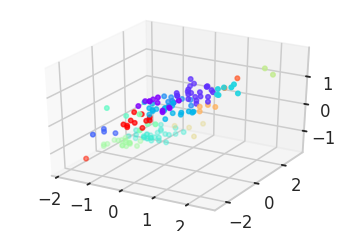

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_euc_avg_1.fit_predict(X), cmap="rainbow")

In [ ]:
clustering_euc_avg_3 = AgglomerativeClustering(n_clusters = None, affinity = "euclidean", linkage = "average", distance_threshold= 3, compute_full_tree= True)

In [ ]:
metrics.silhouette_score(X, clustering_euc_avg_3.fit(X).labels_)

0.4802669329728697

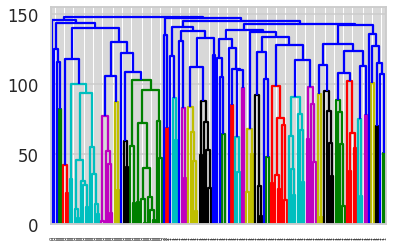

In [ ]:
plot_dendrogram(clustering_euc_avg_3, labels=clustering_euc_avg_3.fit(X).labels_)
plt.show()

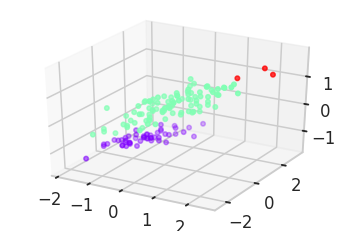

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_euc_avg_3.fit_predict(X), cmap="rainbow")

In [ ]:
clustering_euc_avg_5 = AgglomerativeClustering(n_clusters = None, affinity = "euclidean", linkage = "average", distance_threshold= 0.5, compute_full_tree= True)

In [ ]:
metrics.silhouette_score(X, clustering_euc_avg_5.fit(X).labels_)

0.26847155173255327

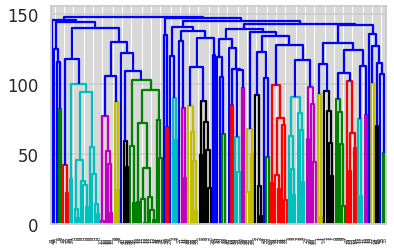

In [ ]:
plot_dendrogram(clustering_euc_avg_5, labels=clustering_euc_avg_5.fit(X).labels_)
plt.show()

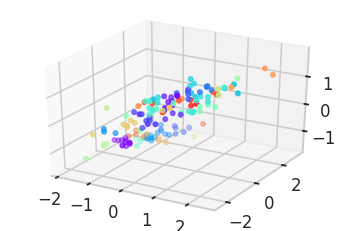

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_euc_avg_5.fit_predict(X), cmap="rainbow")

In [9]:
clustering_euc_avg_8 = AgglomerativeClustering(n_clusters = None, affinity = "euclidean", linkage = "average", distance_threshold= 0.8, compute_full_tree= True)

In [10]:
metrics.silhouette_score(X, clustering_euc_avg_8.fit(X).labels_)

0.32227666978437136

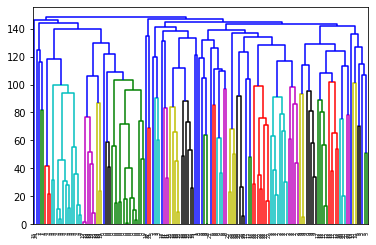

In [11]:
plot_dendrogram(clustering_euc_avg_8, labels=clustering_euc_avg_8.fit(X).labels_)
plt.show()

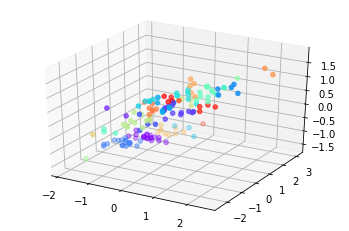

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_euc_avg_8.fit_predict(X), cmap="rainbow")

In [ ]:
###Euclidean affinity and single linkage

In [13]:
clustering_euc_sng_1 = AgglomerativeClustering(n_clusters = None, affinity = "euclidean", linkage = "single", distance_threshold= 1, compute_full_tree= True)

In [14]:
metrics.silhouette_score(X, clustering_euc_sng_1.fit(X).labels_)

0.504645610832545

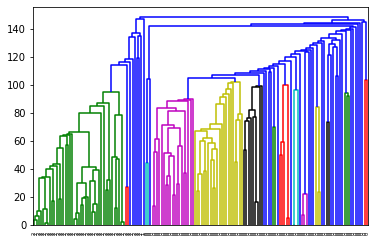

In [15]:
plot_dendrogram(clustering_euc_sng_1, labels=clustering_euc_sng_1.fit(X).labels_)
plt.show()

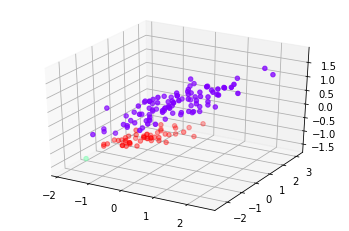

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_euc_sng_1.fit_predict(X), cmap="rainbow")

In [17]:
clustering_euc_sng_2 = AgglomerativeClustering(n_clusters = None, affinity = "euclidean", linkage = "single", distance_threshold= 0.2, compute_full_tree= True)

In [18]:
metrics.silhouette_score(X, clustering_euc_sng_2.fit(X).labels_)

0.11434853799544459

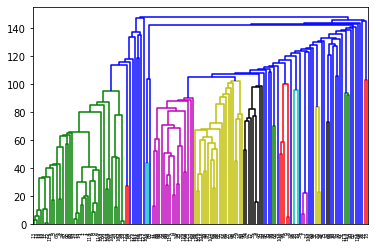

In [19]:
plot_dendrogram(clustering_euc_sng_2, labels=clustering_euc_sng_2.fit(X).labels_)
plt.show()

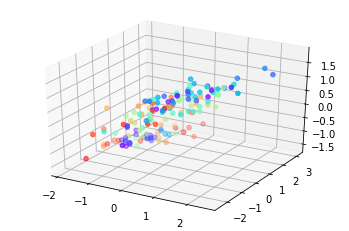

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_euc_sng_2.fit_predict(X), cmap="rainbow")

In [21]:
clustering_euc_sng_5 = AgglomerativeClustering(n_clusters = None, affinity = "euclidean", linkage = "single", distance_threshold= 0.5, compute_full_tree= True)

In [22]:
metrics.silhouette_score(X, clustering_euc_sng_5.fit(X).labels_)

0.00030780114592060905

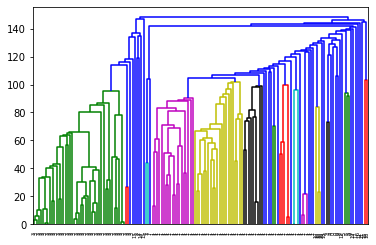

In [23]:
plot_dendrogram(clustering_euc_sng_5, labels=clustering_euc_sng_5.fit(X).labels_)
plt.show()

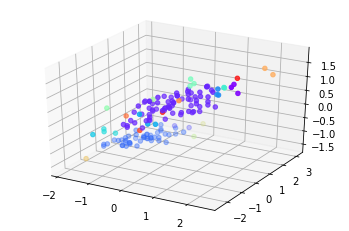

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_euc_sng_5.fit_predict(X), cmap="rainbow")

In [25]:
clustering_euc_sng_8 = AgglomerativeClustering(n_clusters = None, affinity = "euclidean", linkage = "single", distance_threshold= 0.8, compute_full_tree= True)

In [26]:
metrics.silhouette_score(X, clustering_euc_sng_8.fit(X).labels_)

0.3424088551001326

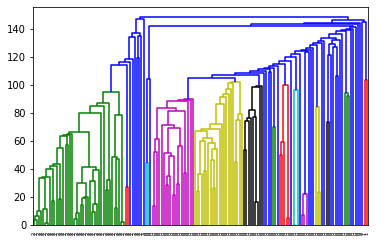

In [27]:
plot_dendrogram(clustering_euc_sng_8, labels=clustering_euc_sng_8.fit(X).labels_)
plt.show()

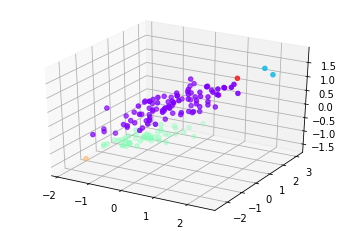

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_euc_sng_8.fit_predict(X), cmap="rainbow")

In [ ]:
###Manhattan affinity and average linkage

In [29]:
clustering_man_avg_1 = AgglomerativeClustering(n_clusters = None, affinity = "manhattan", linkage = "average", distance_threshold= 1, compute_full_tree= True)

In [30]:
metrics.silhouette_score(X, clustering_man_avg_1.fit(X).labels_)

0.2732481526741257

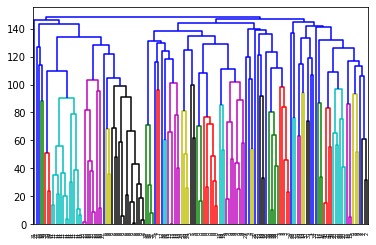

In [31]:
plot_dendrogram(clustering_man_avg_1, labels=clustering_man_avg_1.fit(X).labels_)
plt.show()

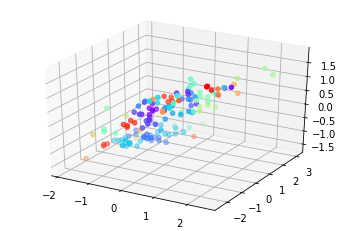

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_man_avg_1.fit_predict(X), cmap="rainbow")

In [33]:
clustering_man_avg_3 = AgglomerativeClustering(n_clusters = None, affinity = "manhattan", linkage = "average", distance_threshold= 3, compute_full_tree= True)

In [34]:
metrics.silhouette_score(X, clustering_man_avg_3.fit(X).labels_)

0.3838386825632119

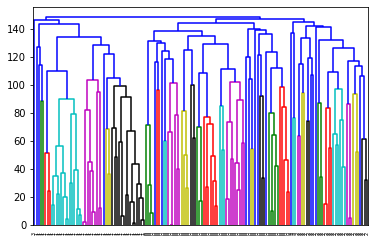

In [35]:
plot_dendrogram(clustering_man_avg_3, labels=clustering_man_avg_3.fit(X).labels_)
plt.show()

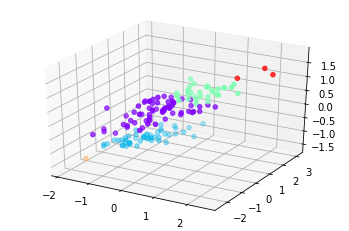

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clustering_man_avg_3.fit_predict(X), cmap="rainbow")

In [37]:
clustering_man_avg_5 = AgglomerativeClustering(n_clusters = None, affinity = "manhattan", linkage = "average", distance_threshold= 5, compute_full_tree= True)

In [38]:
metrics.silhouette_score(X, clustering_man_avg_5.fit(X).labels_)

0.5817500491982808

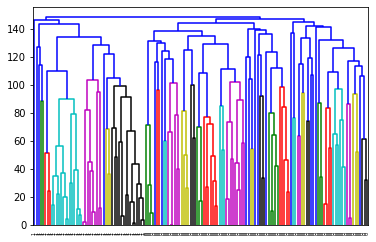

In [39]:
plot_dendrogram(clustering_man_avg_5, labels=clustering_man_avg_5.fit(X).labels_)
plt.show()

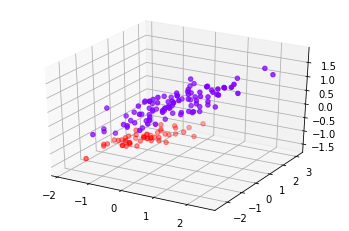

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_man_avg_5.fit_predict(X), cmap="rainbow")

In [41]:
clustering_man_avg_8 = AgglomerativeClustering(n_clusters = None, affinity = "manhattan", linkage = "average", distance_threshold= 0.8, compute_full_tree= True)

In [42]:
metrics.silhouette_score(X, clustering_man_avg_8.fit(X).labels_)

0.2327385000973712

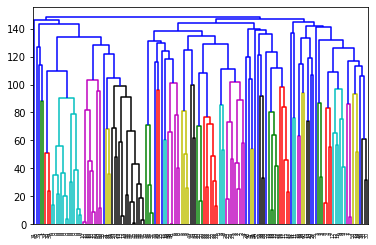

In [43]:
plot_dendrogram(clustering_man_avg_8, labels=clustering_man_avg_8.fit(X).labels_)
plt.show()

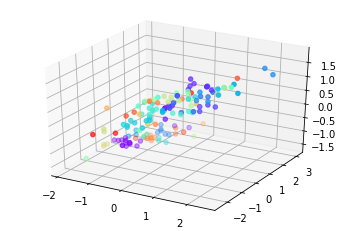

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_man_avg_8.fit_predict(X), cmap="rainbow")

In [ ]:
###Manhattan affinity and single linkage

In [45]:
clustering_man_sng_1 = AgglomerativeClustering(n_clusters = None, affinity = "manhattan", linkage = "single", distance_threshold= 1, compute_full_tree= True)

In [46]:
metrics.silhouette_score(X, clustering_man_sng_1.fit(X).labels_)

0.05331724159191082

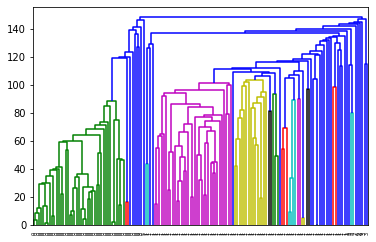

In [47]:
plot_dendrogram(clustering_man_sng_1, labels=clustering_man_sng_1.fit(X).labels_)
plt.show()

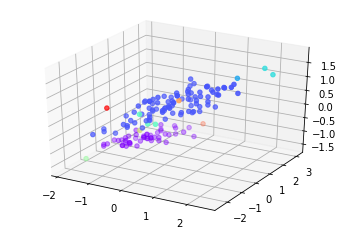

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_man_sng_1.fit_predict(X), cmap="rainbow")

In [49]:
clustering_man_sng_2 = AgglomerativeClustering(n_clusters = None, affinity = "manhattan", linkage = "single", distance_threshold= 2, compute_full_tree= True)

In [50]:
metrics.silhouette_score(X, clustering_man_sng_2.fit(X).labels_)

0.5817500491982808

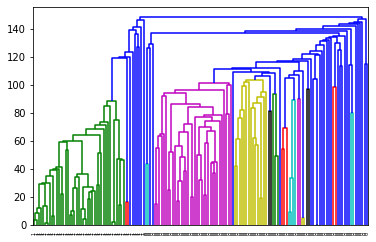

In [51]:
plot_dendrogram(clustering_man_sng_2, labels=clustering_man_sng_2.fit(X).labels_)
plt.show()

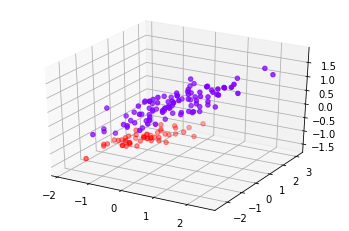

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_man_sng_2.fit_predict(X), cmap="rainbow")

In [53]:
clustering_man_sng_5 = AgglomerativeClustering(n_clusters = None, affinity = "manhattan", linkage = "single", distance_threshold= 0.5, compute_full_tree= True)

In [54]:
metrics.silhouette_score(X, clustering_man_sng_5.fit(X).labels_)

0.047835513205312

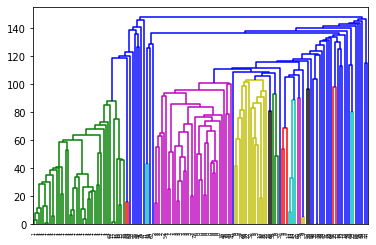

In [55]:
plot_dendrogram(clustering_man_sng_5, labels=clustering_man_sng_5.fit(X).labels_)
plt.show()

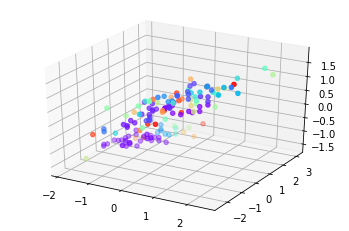

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_man_sng_5.fit_predict(X), cmap="rainbow")

In [57]:
clustering_man_sng_8 = AgglomerativeClustering(n_clusters = None, affinity = "manhattan", linkage = "single", distance_threshold= 0.8, compute_full_tree= True)

In [58]:
metrics.silhouette_score(X, clustering_man_sng_8.fit(X).labels_)

0.005332036670310517

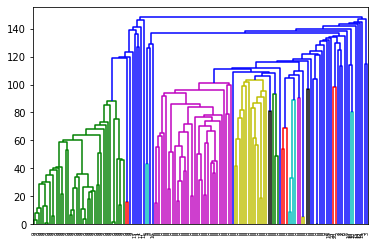

In [59]:
plot_dendrogram(clustering_man_sng_8, labels=clustering_man_sng_8.fit(X).labels_)
plt.show()

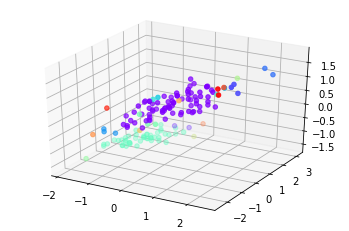

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_man_sng_8.fit_predict(X), cmap="rainbow")

In [ ]:
###Cosine affinity and average linkage

In [61]:
clustering_cos_avg_3 = AgglomerativeClustering(n_clusters = None, affinity = "cosine", linkage = "average", distance_threshold= 3, compute_full_tree= True)

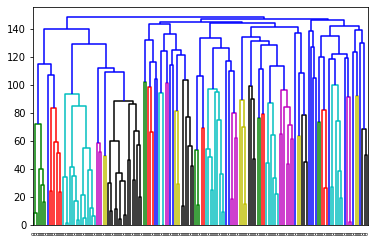

In [62]:
plot_dendrogram(clustering_cos_avg_3, labels=clustering_cos_avg_3.fit(X).labels_)
plt.show()

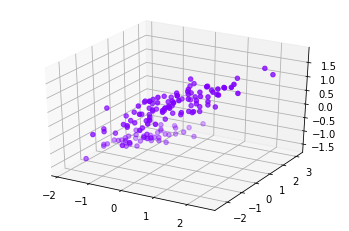

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_cos_avg_3.fit_predict(X), cmap="rainbow")

In [64]:
clustering_cos_avg_8 = AgglomerativeClustering(n_clusters = None, affinity = "cosine", linkage = "average", distance_threshold= 0.8, compute_full_tree= True)

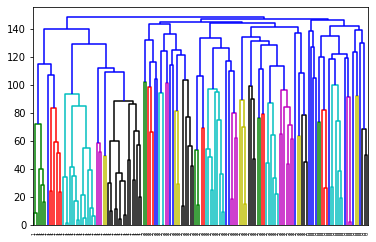

In [65]:
plot_dendrogram(clustering_cos_avg_8, labels=clustering_cos_avg_8.fit(X).labels_)
plt.show()

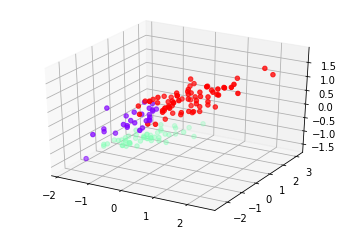

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_cos_avg_8.fit_predict(X), cmap="rainbow")

In [ ]:
###Cosine affinity and single linkage

In [67]:
clustering_cos_sng_1 = AgglomerativeClustering(n_clusters = None, affinity = "cosine", linkage = "single", distance_threshold= 1, compute_full_tree= True)

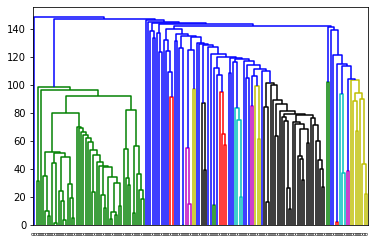

In [68]:
plot_dendrogram(clustering_cos_sng_1, labels=clustering_cos_sng_1.fit(X).labels_)
plt.show()

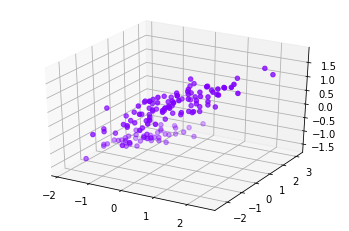

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_cos_sng_1.fit_predict(X), cmap="rainbow")

In [70]:
clustering_cos_sng_5 = AgglomerativeClustering(n_clusters = None, affinity = "cosine", linkage = "single", distance_threshold= 5, compute_full_tree= True)

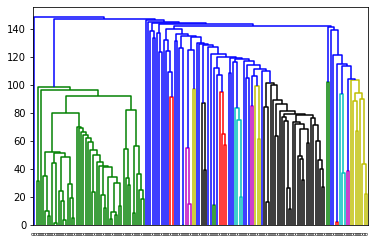

In [71]:
plot_dendrogram(clustering_cos_sng_5, labels=clustering_cos_sng_5.fit(X).labels_)
plt.show()

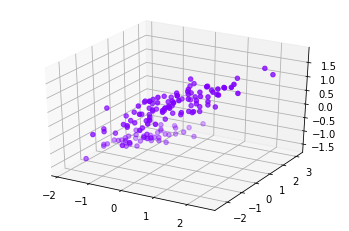

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=clustering_cos_sng_5.fit_predict(X), cmap="rainbow")